<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/NATURAL_LANGUAGE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NATURAL LANGUAGE PROCESSING (NLP)
> Natural Language Processing is the branch of data science that involves systemetic processing of text data to analyse them and do meaningfull operations and get the wanted details from them. We can perform numerous tasks on texts using Natural Language Processing

`eg.`: NLP problems
1. TEXT_CLASSIFICATION --> What tag must an article have (like a wikipedia article)
2. SENTIMENT ANALYSIS --> Analyse sentiments from given peice of texts (like twitter tweets)
3. TEXT GENERATION --> *Intresting and hardest one!* (like generating meaningfull poems)

### TYPES OF SEQUENCING PROBLEMS (NLP AND ALL) -
Nlp is basically sequence problems
1. `ONE-TO-MANY` --> Like caption generation from an image (one image ---> many words)
2. `MANY-TO-ONE` --> Like sentiment analysis (many words of tweet ---> one outpur 'positive' or 'negetive')
 *or Time series forecasting (time series forecasting)*
3. `MANY-TO-MANY` --> Like Language Translation (Many words are translated to many words of diffrent languages)

## ***EXAMPLES OF NLP INPUTS AND OUTPUTS*** -->
* Consider we are trying to predict the sentiment of a YouTube comment. We have inputs as the whole comment... `eg --> When GTA V was launched I was kid, till data GTA VI is not released and now I have kids :)` so the output is **SARCASTIC**

* First we will have to create a numerical encoding of the sequence we have to pass *(Like the comments we have)*

* One way is to tokenize and create embeddings.

## ***TOKENIZATION*** -->
* Tokenization is the process of breaking down the text data into smaller units, like words, phrases, or individual charecters. These tokens can then be used as a vector representation of text documents to perform various NLP tasks.

> * `PROS -->` Without proper tokenization, it can be very difficult to extract meaningful information from text data. It helps to standardize the input data, making it easier to process and analyze.
>
> * `PROS -->` Additionally, tokenization can help to address language-specific challenges such as stemming, lemmatization, and stop-word removal. These techniques are used to normalize text by removing redundant information, making it easier to analyze and model.

1. **WORD TOKENIZATION** -

text = "This was one of my favorite movies last year!" ----> ['This','was','one','of','my','favorite','movies','last','year','!']
2. **SENTENCE TOKENIZATION** -

text = "The second season of the show was better. I wish it never ended!" ----> ['The second season of the show was better.','I wish it never ended!']

3. **PUNCTUATION TOKENIZATION** -


text = 'He said, "I cant believe it!" and then ran off, laughing hysterically. ----> ['He','said',',','``','I','cant','believe','it',"''",'and','then','ran','off','laughing','hysterically','.']

## ***WORD EMBEDDINGS*** -->
Word embeddings are created on tokens (the tokenized data).
*  Word embeddings are vector representations of words, where each dimension of the vector represents a different aspect of the word’s meaning. These vector representations are created using tokenization, where each word is tokenized into individual tokens and then embedded into a vector representation.
* The embeddings are then used as inputs to NLP models, allowing the models to understand the meaning of the words in the text.


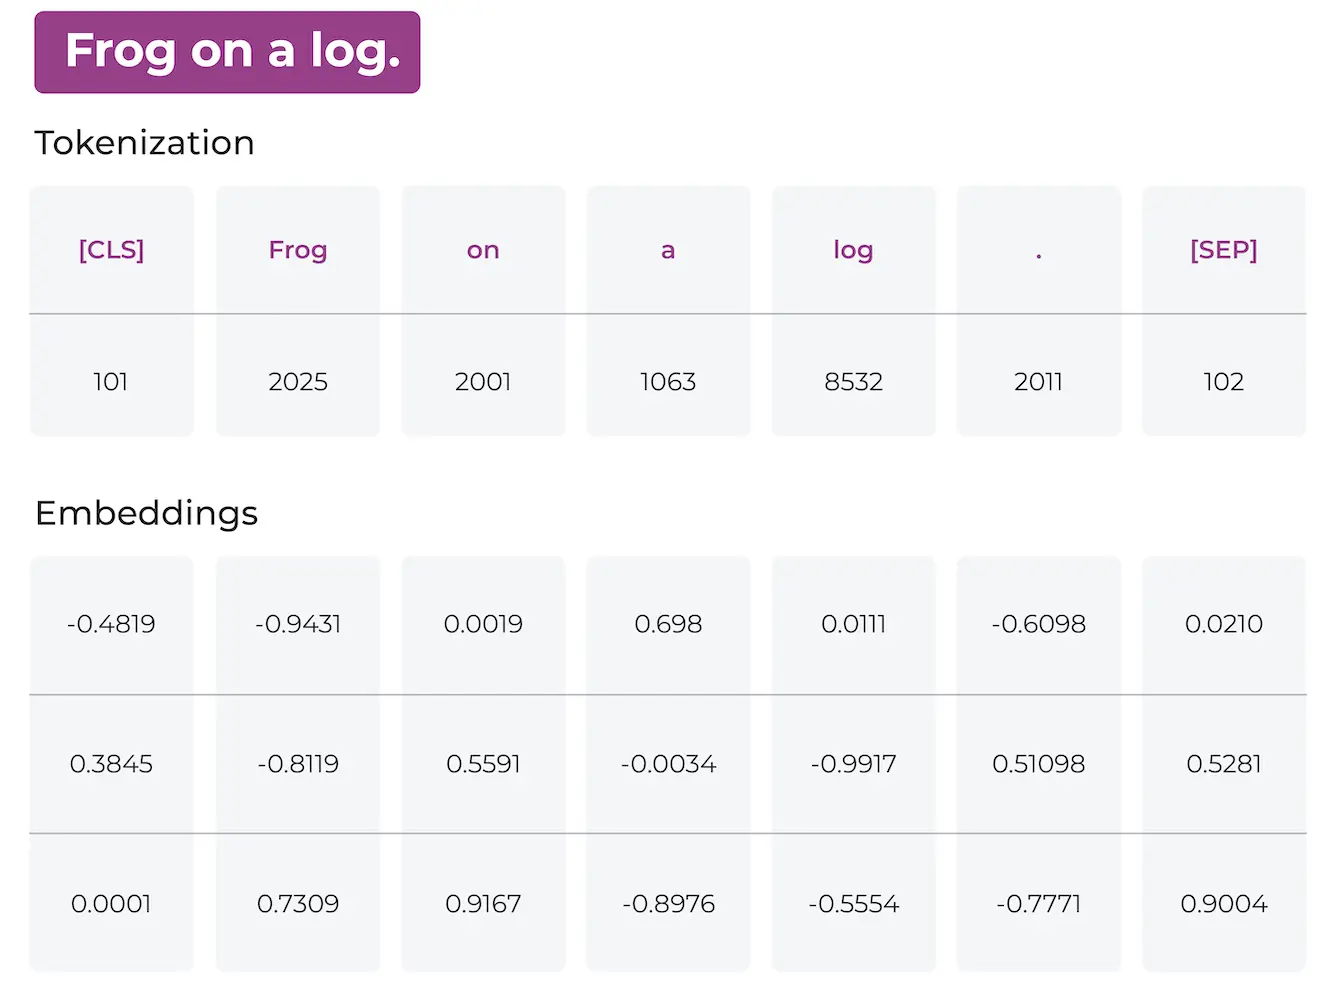

# **RECURRENT NEURAL NETWORKS** -->
Recurrent Nwural Netwroks are used in Sequence Problems.  Simply said, recurrent neural networks can anticipate sequential data in a way that other algorithms can’t.
* ***Recurrent Neural Networks use the same weights for each element of the sequence, decreasing the number of parameters and allowing the model to generalize to sequences of varying lengths***
* ***All of the inputs and outputs in standard neural networks are independent of one another***

when predicting the next word of a phrase, the prior words are necessary, and so the previous words must be remembered. As a result, RNN was created, which used a Hidden Layer to overcome the problem. The most important component of RNN is the Hidden state, which remembers specific information about a sequence.

***RNNs have a Memory that stores all information about the calculations. ***
### LAYERS IN RNN -
1. Input Layer - The input data is passed
2. Text Vectorization Layers - Tokenizes the word
3. Embedding - Turns mapping of text vector into embedding matrix
4. RNN Cells - Finds the patterns in the sequence
5. Hidden layer - Add non linearity to learned feature (**AND REMEMBER PREVIOUS WORDS**)
6. Pooling Layer - Reduce the dimensionality of the learned sequence
7. Fully connected layer - Further refines the learned features
8. Ouput layer - Takes the learned features and outputs them as a simgle prediction
9. Output activation - Add non linearity to output sequence.

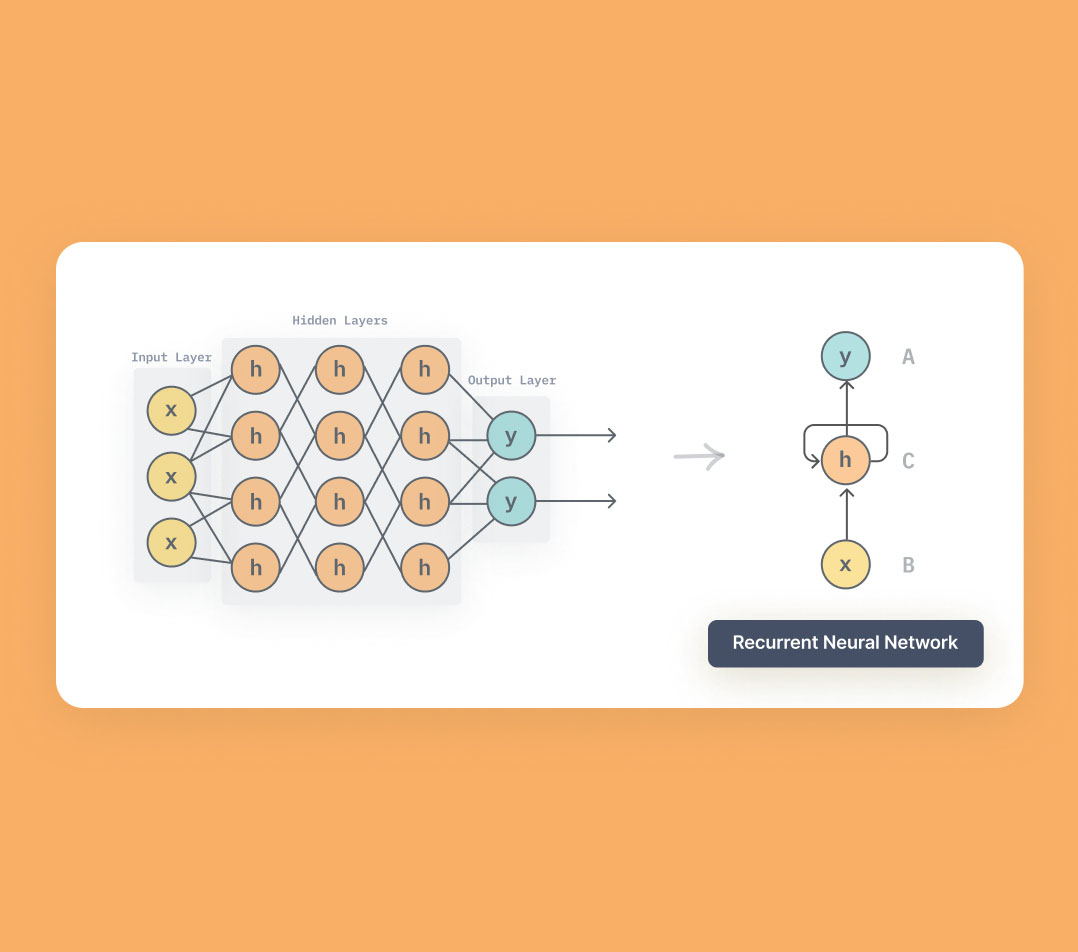

In [ ]:
import datetime
print(f"This notebook was last run on {datetime.datetime.now()}")

This notebook was last run on 2023-08-08 16:56:25.436635


In [ ]:
# Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5c2c9850-a5b9-219a-a99b-49c0cce4a479)


### GET HELPER FUNCTIONS
> Getting the helper functions from bootcamp github page. https://github.com/mrdbourke/tensorflow-deep-learning/tree/main/extras


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for this notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-08-08 16:56:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-08 16:56:25 (115 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## GET A TEXT DATASET

The dataset we are going to be using is kaggle's introduction to NLP dataset **[TEXT SAMPLE OF TWEETS LABELLED AS DISASTER OR NON-DISASTER]**
1. Many to one
2. Binary

`source` - https://github.com/mrdbourke/tensorflow-deep-learning

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-08-08 16:56:30--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.22MB/s    in 0.5s    

2023-08-08 16:56:30 (1.22 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples we first have to read them. We can do it with pure python code...but to get visual straight away, we can use pandas or tensorflow inbuilt.

> ***ASSIGNMENT ->*** `In future self projects, try using pythons and see how they are diffrent`


> ***ASSIGNMENT ->*** `Use the tensorflow data loader in the future`

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


The main we want is the text and the target column

In [ ]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

It could be a disaster as the tweet talks about an earthquake

In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

This is the disaster one

##### 0 and 1 values
`1 -->` REAL DISASTER


`0 -->` NON DISASTER

In [ ]:
# shuffle the training dataset (important)
train_df_shuffled = train_df.sample(frac=1, random_state=42)
# frac --> fraction of data to shuffle

In [ ]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


Now we have shuffled data. Let's also visualize the test dataset

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Same as the train df but without target. We have to build a model to predict these target values

In [ ]:
# How many examples of each class -- to check if data is balanced or not
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples ?
len(train_df)

7613

In [ ]:
len(test_df)

3263

We have total 10000 samples, 70 percent is the train_df and 30 percent is the test df

In [ ]:
# Let's visualize some random training examples
import random
def get_samples(df):
  for i in range(0,5):
    random_index = random.randint(0,len(df)-5)
    print(df["text"][random_index],"\n")
    if df["target"][random_index]==1:
      print(f"CLASS -- > DISASTER")
    elif df["target"][random_index] ==0:
      print(f"CLASS --> NON DISASTER")
    print("-----------------------------------------------------------")
    print(" ")

get_samples(train_df)


I hope they fall off a cliff. 

CLASS --> NON DISASTER
-----------------------------------------------------------
 
Deaths 3 http://t.co/nApviyGKYK 

CLASS --> NON DISASTER
-----------------------------------------------------------
 
Road Hazard @ CASCADE RD SW / CHILDRESS DR SW http://t.co/DilyvRoWyJ 

CLASS --> NON DISASTER
-----------------------------------------------------------
 
IJ: Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/h132iuL7MU 

CLASS -- > DISASTER
-----------------------------------------------------------
 
Did I drink too much? Am I losing touch? Did I build a ship to wreck? 

CLASS --> NON DISASTER
-----------------------------------------------------------
 


## SPLIT DATA INTO TRAIN AND VALIDATION SPLITS

In [ ]:
from sklearn.model_selection import train_test_split

# Use train test split to create training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

Validation split is 10% of the real data (7500+ samples)

In [ ]:
# CHeck the first 10 sentences
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# TOKENIZATION AND EMBEDDINGS -->
### SOME COMMON METHODS OF PREPROCESSING DATA IN NLP -
1. Tokenization
2. Stop words removal
3. Stemming
4. Normalization
5. Lemmatization
6. Parts of speech tagging

#### **TOKENIZATION -**
Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP.
`For example, the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’`

#### **STOP WORDS REMOVAL -**
* Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.
* By removing these words, we remove the low-level information from our text in order to give more focus to the important information.
* *We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve. For example, if we are training a model that can perform the sentiment analysis task, we might not remove the stop words.*

#### **STEMMING -**
* we employ stemming to reduce words to their basic form or stem, which may or may not be a legitimate word in the language.
* For instance, the stem of these three words, connections, connected, connects, is “connect”.

#### **NORMALIZATION -**
* When we normalize text, we attempt to reduce its randomness, bringing it closer to a predefined “standard”. This helps us to reduce the amount of different information that the computer has to deal with, and therefore improves efficiency.

#### **LEMMENIZATION -**
* Lemmatization takes a word and breaks it down to its lemma. For example, the verb "walk" might appear as "walking," "walks" or "walked." Inflectional endings such as "s," "ed" and "ing" are removed. Lemmatization groups these words as its lemma, "walk."

#### **PARTS OF SPEECH TAGGING -**
* Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.




# CONVERTING TEXT INTO NUMBERS
When dealing with text problems, one of the first things you have to doe is to convert text to numbers.

There are few ways to do this -
* Tokenization - direct mapping of token to number
* Embedding - create a matrix feature of token.

## Text Vectorization (TOKENIZATION)
> **LINK** - `https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization`


The processing of each sample contains the following steps -
1. Standardize each sample (usually lowecasing + punctuation stripping)
2. split each sample into substring (usually words)
3. recombine substrings into tokens (usually ngrams)
4. index tokens (associate a unique value with each token)
5. transform each sample using this index, either into a vector of ints or a dense float vector.

#### DEFAULT EXAMPLE OF TEXT VECTORIZER

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVecotorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None


In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup the text variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (eg - how many words from a tweet our model sees)

text_vectorizer  = TextVectorization(max_tokens=max_vocab_length,
                                     output_mode="int",
                                     output_sequence_length = max_length)

##### **NEXT STEP**
The next step is to map this text vectorizer or adapt it to our training data

In [ ]:
# Fit the text vectrorizer to the training text
text_vectorizer.adapt(train_sentences) # leveraging the adapt method to fit the train sentences to the textvectorizer

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There is a flood in my street!"

# note --> text vectorizer takes a list/ array
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

* ***Note that we have 15 length as the max toens is 15***
* ***Textvectorizer takes in a list***

In [ ]:
# Choosing a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
When there's a fire alarm going off in zehrs and we keep working for 20 minutes then decide to evacuate everyone..      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  45,  264,    3,   42, 1154,  104,  102,    4, 6501,    7,   46,
         375, 1049,   10,  693]])>

In [ ]:
# Choosing another random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
It's Even Worse Than It Looks: How the American Constitutional System Collided With the New PoliticÛ_ http://t.co/Gfa3SOw9zn      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  37,  151, 1100,   76,   15,  287,   62,    2,  692,    1, 1584,
         321,   14,    2,   50]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common 5 words
bottom_5_words = words_in_vocab[-5:] # least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 most uncommon words {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 most uncommon words ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


* **[UNK] means unknown token (words outside the top 10000)**

## ***CREATING AN EMBEDDING using Embedding Layer***
> `link --> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding`

To make our embeddings, we are going to use Tensorflow's embedding layers.

The parameters that we create most for our embedding layer :
* `input_dim` = the size of our vocabulary
* `output_dim`  the size of the output embedding vector, for example a value of 100 means that each token will be 100 vector long.
* `input-length` = length of sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length, # set the input shape
                             output_dim = 128, # output shape
                             input_length=max_length, # how long is each input
                             )

embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @robertmeyer9 re: your example low food prices cause farmers to go broke= famine next year. means simple Capitalism failed to feed people&gt;      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02749943, -0.02648476, -0.03063378, ...,  0.00913493,
          0.00572855, -0.02709588],
        [ 0.02002387,  0.03448075, -0.02443345, ...,  0.02771146,
          0.01889152, -0.00921482],
        [ 0.01118075,  0.00767604,  0.03953211, ..., -0.01825038,
          0.0434492 , -0.02640129],
        ...,
        [-0.03602976,  0.04562579, -0.00553171, ..., -0.036539  ,
          0.02372468, -0.0446202 ],
        [-0.01838141, -0.01225771,  0.02434592, ...,  0.00582882,
         -0.02649126,  0.01012301],
        [-0.02696841, -0.0015471 ,  0.02133359, ..., -0.00943726,
         -0.03524238, -0.03295373]]], dtype=float32)>

In [ ]:
# Check out a single tokens embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02749943, -0.02648476, -0.03063378, -0.04128431, -0.00503444,
        -0.01350749, -0.03589418,  0.03030017, -0.00615143,  0.01343825,
         0.04664341,  0.03628402,  0.02807459,  0.02573423,  0.04788691,
         0.00358167,  0.04387636,  0.00286698,  0.02803043, -0.04366452,
        -0.00918169,  0.04495574, -0.003263  , -0.02026548, -0.02149401,
         0.02001036, -0.04555207, -0.00598662,  0.01978654, -0.00043375,
        -0.00676094,  0.01242726, -0.04282471, -0.03722341,  0.02247112,
        -0.04264712,  0.0223112 ,  0.02098656,  0.02435403,  0.03740324,
        -0.04807779, -0.01893619,  0.03828197,  0.01059891,  0.02828722,
        -0.02101749,  0.03005394,  0.03021285, -0.01039179,  0.03812594,
         0.00202998, -0.01979108,  0.01790387,  0.01881463, -0.01312531,
         0.02900907, -0.03761665,  0.01382564, -0.01626856, -0.00369818,
        -0.03509276, -0.03629103,  0.00616747,  0.04486995,  0.04120496,
  

#  MDOELLING A TEXT DATASET (Running a series of experiments)

Now we've got way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with baseline and move on form there.

* `Model 0:` Naive Bayes (baseling)
* `Model 1:` Feed-forward neural network (RNN)
* `Model 3:` GRU Model (RNN)
* `Model 4:` Bidirectional-LSTM model (RNN)
* `Model 5:` ID Convolutional Neural Network (CNN)
* `Model 6:` Tensorflow hub pretrained feature extractor (using transfer learning for NLP)
* `Model 7:` Same as model 6 with 10% of data

##### *Standard steps :*
* Create model
* Compile Model
* Fit Model
* Evaluate Model
* Repeat

## NAIVE BAYES CLASSIFIER

* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
* It is mainly used in text classification that includes a high-dimensional training dataset.
* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

> ***NAIVE BAYES WORKS ON THE FOLLOWING RULE -***


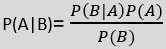

* P(A|B) = Probability of assumption A on observed event B
* P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a assumption is true.
* P(A) is Prior Probability: Probability of assumption before observing the evidence.
* P(B) is Marginal Probability: Probability of Evidence

### ***Model 0: Getting a Baseline***

As with all machine learning modelling experiments, it's important to create a baseline model to keep a record of future models performance.

* We'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

***NOTE*** - *It is common to use non DL models as a baseline and further create DL models and beat the baseline and get the best possible results*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
# Pipeline takes in a list of tuple
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()), #convert words to numbers using tfidf
    ("clf",MultinomialNB()) # model the text
])

# Fit pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make Predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

***Using more model metrics for evaluation***

### Creating an evaluation function for model experiments

Let's create a function as we have lots of models to create and then evaluate.


wE'LL USE THE FOLLOWING METRICS -

1. `Accuracy`: The overall correctness of the model's predictions, calculated as (TP + TN) / (TP + TN + FP + FN).

2. `Precision`: The proportion of true positive predictions over the total predicted positive instances, calculated as TP / (TP + FP).

3. `Recall` (Sensitivity): The proportion of true positive predictions over the total actual positive instances, calculated as TP / (TP + FN).

4. `F1 score`: The harmonic mean of precision and recall, providing a balance between the two metrics, calculated as 2 * (Precision * Recall) / (Precision + Recall).


In [ ]:
# Function to evaluate all
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates the model accuracy, precision and f1 score of a binary classification model.
  """
  # Calculate odel accuracy
  model_accuracy = accuracy_score(y_true, y_pred) *100
  # Calculate the model precision, recall and f1 score using "weighted average"
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1}

  return model_results



In [ ]:
# Get baseline results
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### ***MODEL 1: A SIMPLE DENSE MODEL***

In [ ]:
# Create a TensorBoard callback (need to create one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build Model with the functional API
from tensorflow.keras import layers

# note the text vectorizerm, embedding etc layers are imported above,
# while refrencing this cell, dont just copy this, import and intialize them first

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230808-165636
Epoch 1/5
215/215 [==============================] - 32s 111ms/step - loss: 0.6128 - accuracy: 0.6949 - val_loss: 0.5378 - val_accuracy: 0.7428
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4425 - accuracy: 0.8190 - val_loss: 0.4720 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3476 - accuracy: 0.8584 - val_loss: 0.4612 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2853 - accuracy: 0.8897 - val_loss: 0.4682 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2373 - accuracy: 0.9118 - val_loss: 0.4852 - val_accuracy: 0.7900


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7900


[0.48519885540008545, 0.7900262475013733]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.31007862], dtype=float32)

In [ ]:
model_1_pred_probs[:10]

array([[0.31007862],
       [0.749731  ],
       [0.9977392 ],
       [0.10141666],
       [0.09764659],
       [0.92773587],
       [0.9133533 ],
       [0.99245054],
       [0.9608257 ],
       [0.25378093]], dtype=float32)

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

***We want to compare the above 2, which are not in the right format, these are like apple and oranges and we cannot compare them, either we have to compare apples and apples or oranges and oranges***

*Let's make them similiar*
* we have shape of (762, 1), we need to get rid of 1 extra dimension first and round them to 0 or 1

In [ ]:
# Convert the model prediction in label format

# we have shape of (762, 1), we need to get rid of 1 extra dimension first and round them to 0 or 1
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'precision': 0.7975156487081627,
 'recall': 0.7900262467191601,
 'f1': 0.7863113264688066}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

***COMPARING THEM NUMERICALLY***

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(model_1_results.values()))

array([False, False, False, False])

## ***Vizualizing the learned embeddings***

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.04064482, -0.00133061,  0.01989164, ...,  0.04787207,
         0.01014378, -0.05732499],
       [-0.0187869 ,  0.030563  , -0.00861929, ...,  0.04593876,
        -0.03013986,  0.01225653],
       [ 0.04076482, -0.02749249, -0.0019414 , ...,  0.01478781,
        -0.00098641, -0.03984019],
       ...,
       [ 0.00822031, -0.02916272,  0.01913638, ..., -0.04208012,
         0.02477398, -0.04160634],
       [ 0.04277374, -0.00828341, -0.08004098, ...,  0.01136452,
         0.03472111,  0.00286656],
       [ 0.09885018,  0.05005302, -0.04212308, ...,  0.03100753,
         0.09387874, -0.03223985]], dtype=float32)

In [ ]:
print(embed_weights.shape) # same size as vocab size and embedding dim

(10000, 128)


# ***RECURRENT NEURAL NETWORKS***

* ***RNN's are useful for sequence data***

The premise of a recurrent neural networks is to use the representation of the previous input to aid the representaition of the next input.
* ***Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far.***

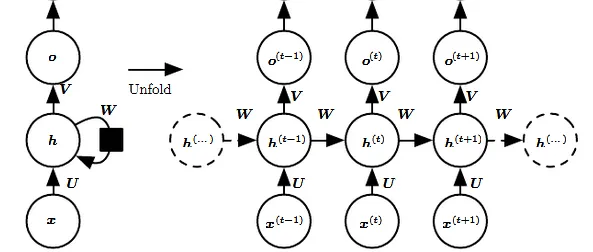


1. `INPUT` *x(t)* - s taken as the input to the network at time step t
2. `HIDDEN STATE` *h (t)* - h(t)​ represents a hidden state at time t and acts as “memory” of the network. h(t)​ is calculated based on the current input and the previous time step’s hidden state: h(t)​ = f(U x(t)​ + W h(t−1)​). The function f is taken to be a non-linear transformation such as tanh, ReLU.

### HOW IT WORKS
1. Each neuron takes the input and passes it to the next neuron in a chain-like fashion. This way, the information flows through the network, and each neuron can learn from the previous ones.
2. The RNN is designed to remember what it has seen before by creating a loop within itself. So, as new data comes in, it combines it with the knowledge it already has from the past.
3. Means the data is passed once, it learns something and this is done in a loop

### TIME STEPS
In the context of Recurrent Neural Networks (RNNs), a time step refers to a single step or instance in the sequential data being processed. Each time step represents a specific moment or position in the sequence.

For example, if we have a sentence "I love chatbots," we can break it down into four time steps:

* Time Step 1: "I"
* Time Step 2: "love"
* Time Step 3: "chatbots"
* Time Step 4: "."



### ***FORWARD PASS*** -

The forward pass in a neural network is the process of input data flowing through the network's layers to produce an output or prediction. It involves applying weights and biases to the data, passing it through activation functions, and generating the final result. During training, the network learns from the output's performance to improve its predictions.

### ***BACKWARD PASS*** -
* The backward pass, also known as backpropagation, is the second step in training a neural network. After the forward pass, where the network makes predictions and calculates the loss, the backward pass comes into play to fine-tune the network's parameters (weights and biases) for better performance.

1. ***During the forward pass, the model makes prediction. The loss is calculated as the diffrence between the prediction and truth label and is considered as loss. In next propogation, the model tries to reduce this loss***

In the backward pass (backpropagation), the neural network computes the gradients of the loss function with respect to its parameters (weights and biases). These gradients indicate how the loss would change concerning small changes in the parameters.
> `NOTE` - *The backward pass does not involve making new predictions*

2. ***Once the network knows how much each parameter influenced the error, it updates the parameters to minimize the error. The network adjusts the weights and biases in the opposite direction of the gradient of the loss function. This step is where the network "learns" from its mistakes and fine-tunes its parameters to make better predictions.***

## ***MODEL 2: LSTM***

LSTM = Long Short Term Memory - one of the most popular LSTM cells

Our structure of RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probabilities)
```

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape, "before the LSTM layer")
x = layers.LSTM(64, return_sequences=True)(x) # hidden units - 64
print(x.shape, "after LSTM with return_sequences TRUE")
x = layers.LSTM(64)(x)
print(x.shape,"after LSTM without return_sequences TRUE")
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="Model_2LSTM")

(None, 15, 128) before the LSTM layer
(None, 15, 64) after LSTM with return_sequences TRUE
(None, 64) after LSTM without return_sequences TRUE


### **TANH ACTIVATION**

Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. But it did not solve the vanishing gradient problem that sigmoids suffered, which was tackled more effectively with the introduction of ReLU activations.

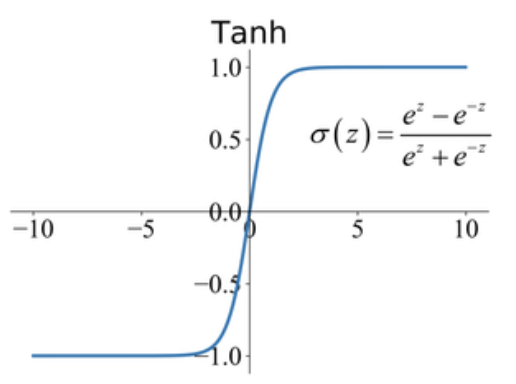



In [ ]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230808-165721
Epoch 1/5
215/215 [==============================] - 20s 64ms/step - loss: 0.2228 - accuracy: 0.9228 - val_loss: 0.5176 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1597 - accuracy: 0.9416 - val_loss: 0.6324 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1328 - accuracy: 0.9496 - val_loss: 0.7406 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1078 - accuracy: 0.9569 - val_loss: 0.8832 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0795 - accuracy: 0.9670 - val_loss: 1.1200 - val_accuracy: 0.7822


In [ ]:
# Make predictions with the LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.2138770e-03],
       [5.7244980e-01],
       [9.9998963e-01],
       [6.5329552e-02],
       [1.3127166e-04],
       [9.9992180e-01],
       [9.9325365e-01],
       [9.9999344e-01],
       [9.9998927e-01],
       [3.1379715e-01]], dtype=float32)

In [ ]:
# Convert mode 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels, y_pred=model_2_preds)
model_2_results

{'accuracy': 78.21522309711287,
 'precision': 0.7843528649827862,
 'recall': 0.7821522309711286,
 'f1': 0.7800522271093588}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## ***MODEL 3 - GRU MODEL***

Another popular  and effective RNN component os the GRU or gated recurrent unit.
*  GRUs are improved version of standard recurrent neural network.
* ***GRUs solve the vanishing gradient problem***

#### ***THE VANISHING GRADIENT PROBLEM***
In recurrent neural networks, when we pass in the data, the model learns something from it and passes it over. It evalutaes its performanice at each pass through a loss function. But when we get deeper intor the learning, sometimes the learning rate of the model (the loss function) gets so smaller that the model stops learning and imporoving, this is the vanishing gradient problem.

##### **WHY?**
1. ***Certain activation functions, like the sigmoid function, squishes a large input space into a small input space between 0 and 1. Therefore, a large change in the input of the sigmoid function will cause a small change in the output. Hence, the derivative becomes small.***


2. The issue arises because of certain activation functions commonly used in neural networks, such as the sigmoid function. As the network goes deeper, the gradients of the sigmoid function become small, and when these small gradients are multiplied together through the layers during backpropagation, they compound and result in extremely tiny updates to the network's parameters. Consequently, the network's learning becomes slow, and it may get stuck or struggle to learn complex patterns effectively.

* ***To solve the vanishing gradient problem of a standard RNN, GRU uses, so-called, update gate and reset gate. ***

*Let's code one GRU model*

In [ ]:
# Build an RNN using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x) # if u want to stack recurrent layers on top of each other, you can out return sequences = true
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(99)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 99)                49005     
                                                       

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 21s 68ms/step - loss: 0.1363 - accuracy: 0.9558 - val_loss: 0.7560 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0754 - accuracy: 0.9711 - val_loss: 0.9551 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0631 - accuracy: 0.9736 - val_loss: 0.9635 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0599 - accuracy: 0.9721 - val_loss: 1.4607 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0555 - accuracy: 0.9762 - val_loss: 1.6432 - val_accuracy: 0.7651


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[8.5539027e-04],
       [4.7831395e-01],
       [9.9999738e-01],
       [1.1399899e-03],
       [2.1621468e-05],
       [9.9996161e-01],
       [9.9771488e-01],
       [9.9999845e-01],
       [9.9999642e-01],
       [1.0910586e-01]], dtype=float32)

In [ ]:
# Convert the model_3 predprobs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.7678247467805763,
 'recall': 0.7650918635170604,
 'f1': 0.7623298399088922}

## ***Model 4: Bidirectional Model***

Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. The input sequence is fed in normal time order for one network, and in reverse time order for another.

* ***BRNNs process input sequences in both the forward and backward directions***

In [ ]:
# Build a Bidirectional RNN in Tensorflow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs  = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="MODEL_4_BIDIRECTIONAL")

In [ ]:
# Get a summary
model_4.summary()

Model: "MODEL_4_BIDIRECTIONAL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,  val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230808-165844
Epoch 1/5
215/215 [==============================] - 24s 74ms/step - loss: 0.1034 - accuracy: 0.9641 - val_loss: 1.1425 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0553 - accuracy: 0.9743 - val_loss: 1.2863 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0483 - accuracy: 0.9765 - val_loss: 1.3814 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0463 - accuracy: 0.9785 - val_loss: 1.4506 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0434 - accuracy: 0.9783 - val_loss: 1.3746 - val_accuracy: 0.7598


In [ ]:
# Make prediction with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 6ms/step


array([[6.9091195e-01],
       [5.9099358e-01],
       [9.9991977e-01],
       [4.1437519e-01],
       [5.7135047e-05],
       [9.9945730e-01],
       [9.9542600e-01],
       [9.9994385e-01],
       [9.9992025e-01],
       [2.3182993e-01]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate the results of bidirectional model
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7597625353264251,
 'recall': 0.7598425196850394,
 'f1': 0.7586850461611226}

In [ ]:
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.7678247467805763,
 'recall': 0.7650918635170604,
 'f1': 0.7623298399088922}

***Looks like our bidirectional experiment performs even worse than the real model***

## ***CONVOLUTIONAL NEURAL NETWORKS FOR TEXTS (and other types of sequences)***
### **CONV1D**
Conv 1d layer is commonly used in sequence problems and deep learning model. In a text data, sentences are convertted into sequence and tokens and each sequence is a seperate element. The conv1D passes learnable fiters over the seqneces in each pass (each slide) to make them learnable.
* **The main advantage of Conv1D layers in NLP is their ability to capture local patterns and dependencies in the data. For eg - in text classifications, conv1d layers can automatically learn to detect important n-gram feature that might be usefull when analyzing text data when order and local relationships are important**
* In NLP, Conv1D layers are often used in tasks like text classification, sentiment analysis, named entity recognition, and more, where capturing local patterns in the data is crucial for accurate predictions.

*Let's code one!*

## ***Model 5: Conv1D***

In [ ]:
# Test out our embedding layer, Conv1D layer and maxpooling
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is test sentence"])) # turn target sequence into embedding

conv_1d = layers.Conv1D(filters=32, # number of hidden layers in output
                        strides=2, # hops 2 at a time
                        kernel_size=5, # this is also reffered as ngram of 5, means looks 5 words at a time
                        activation="relu",
                        padding="valid") # default = "valid", the output is smaller then the input shape and same means output is same as input
conv_1d_output = conv_1d(embedding_test) # pass the test embedding through conv1D layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)# equivalent to get the most important feature (get the feature with highest percent value)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

* ***Due to the valid padding, the input dim goes from 15--->11, had it been padding it would not have changed***
* ***default = "valid", the output is smaller then the input shape and "same" means output is same as input***

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0419787 ,  0.0327322 , -0.01835076, ...,  0.01070857,
          0.0877443 ,  0.00072707],
        [-0.0070039 , -0.05578448, -0.03852994, ...,  0.03049567,
          0.00704111, -0.02188206],
        [-0.0168366 ,  0.03594267,  0.0249847 , ...,  0.06645419,
         -0.03263454, -0.01149661],
        ...,
        [ 0.02750427,  0.00189199, -0.00320863, ...,  0.03478705,
          0.00611315, -0.02528914],
        [ 0.02750427,  0.00189199, -0.00320863, ...,  0.03478705,
          0.00611315, -0.02528914],
        [ 0.02750427,  0.00189199, -0.00320863, ...,  0.03478705,
          0.00611315, -0.02528914]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[2.4676192e-04, 7.7512898e-02, 5.6027137e-02, 6.8462595e-02,
         1.7585225e-02, 9.0519441e-03, 6.3739441e-02, 6.0610987e-02,
         5.7864808e-02, 9.9094836e-03, 9.0939946e-02, 4.7866289e-02,
         1.0448766e-01, 0.0000000e+00, 1.3187984e-02, 1.0751923e-02,
         6.3647190e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 1.7909370e-02, 2.5805988e-04, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9176800e-03,
         0.0000000e+00, 1.6158959e-03, 0.0000000e+00, 8.0940099e-03],
        [0.0000000e+00, 2.9346099e-02, 8.1092075e-02, 3.8183544e-02,
         0.0000000e+00, 0.0000000e+00, 3.5733707e-02, 1.8017087e-02,
         0.0000000e+00, 1.3571215e-02, 0.0000000e+00, 8.3681569e-02,
         4.6681996e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 1.0962902e-01, 8.4814362e-02, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 2.0665070e

* ***note -- there are a lot of 0's***
* ***This is because relu. returns max{0,z} so we get some zeros ***

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.00024676, 0.0775129 , 0.08109207, 0.0684626 , 0.01758523,
        0.04743325, 0.06373944, 0.06061099, 0.06244174, 0.01357121,
        0.09093995, 0.08368157, 0.10448766, 0.        , 0.03648083,
        0.01075192, 0.00644747, 0.10962902, 0.08481436, 0.        ,
        0.06296183, 0.07493805, 0.02066507, 0.04738621, 0.09635115,
        0.        , 0.08090798, 0.00191768, 0.02929125, 0.00817477,
        0.02766386, 0.01840474]], dtype=float32)>

* ***challenge --> try the average pooling layer and see what happens***

* ***maxpool condenses this into ine single condensed feature vector***

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=2, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x) # challenge --> try the average pooling layer and see what happens
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230808-172852
Epoch 1/5
215/215 [==============================] - 17s 61ms/step - loss: 0.1289 - accuracy: 0.9565 - val_loss: 0.8392 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0767 - accuracy: 0.9736 - val_loss: 0.9473 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0592 - accuracy: 0.9781 - val_loss: 1.0921 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0535 - accuracy: 0.9801 - val_loss: 1.1413 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0494 - accuracy: 0.9796 - val_loss: 1.1577 - val_accuracy: 0.7546


In [ ]:
# Make some predictions with our conv1d model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[9.4442356e-01],
       [9.7716719e-01],
       [9.9999690e-01],
       [4.3198321e-02],
       [8.3359209e-06],
       [9.9984372e-01],
       [9.9881434e-01],
       [9.9999988e-01],
       [9.9999988e-01],
       [7.0027238e-01]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluate model 5
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.754158223956957,
 'recall': 0.7545931758530183,
 'f1': 0.7539020023463898}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## ***MODEL 6: Tensorflow Hub Pretrained Model***

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "When you call a universal sentence encoder to a sentence it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602836  0.01068853  0.02425464 -0.01405769  0.01434427  0.08292627
  0.0196337   0.06160139 -0.00352701 -0.01216416  0.00978647 -0.01248499
  0.01232347  0.09748451  0.06141113 -0.03728353  0.01860887 -0.04669852
  0.00413913 -0.06363907 -0.02469897  0.02713692  0.02284444 -0.00210029
 -0.00630592 -0.03964961  0.02220407  0.00115074 -0.03132182  0.00119528
 -0.0401255   0.04561896 -0.01530598 -0.00175914  0.02173134 -0.08450425
  0.03340027  0.04604555 -0.02480251 -0.08681663  0.00702696 -0.00770477
 -0.01434537  0.07814164 -0.10676058 -0.05152996 -0.00858158 -0.0323223
 -0.03871096  0.02581472], shape=(50,), dtype=float32)


In [ ]:
# Create a keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        name="USE")

In [ ]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
],name="model_^_USE")

# Compile
model_6.compile(loss="binary",
                optimzer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

TypeError: ignored